# A DATA CHALLENGE

Well, I came across this challenge and its dataset via X(formerly Twitter). 

There were already some questions that has been asked, so I decided to fix these questions using Python (pls I do use other tools for Data Science/Analysis, but I'm a Python fanboy)

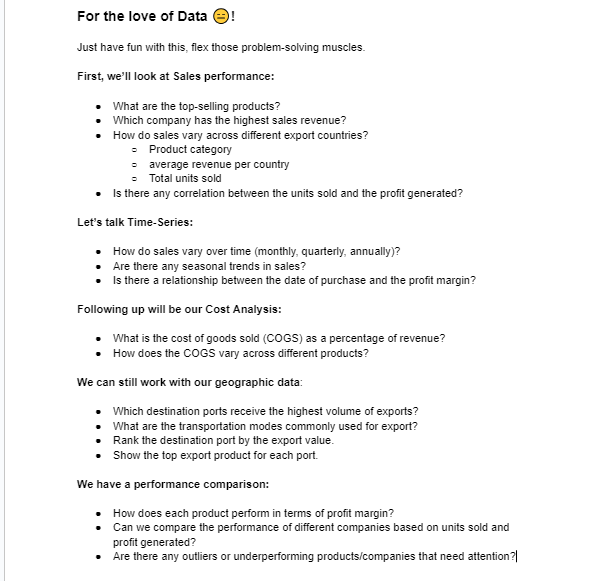

# Data Exploration:

I started this task with Data Exploration/ EDA

In [134]:
# import the necessary python libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
# parsing the dataset into a dataframe, i used .read_csv because the dataset format is in a .csv 

df = pd.read_csv('nigeria_agricultural_exports.csv')

In [136]:
# Displaying the first five rows of the dataframe

df.head()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode
0,Rubber,Farmgate Nigeria Limited,Austria,11/16/2023,721,31443.05,5863.92,22670439.05,Lagos,Sea
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,1/8/2021,881,23151.97,5868.73,20396885.57,Lagos,Sea
2,Cassava,Farmgate Nigeria Limited,Germany,10/14/2020,702,18536.45,5105.01,13012587.90,Calabar,Sea
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,12/31/2022,191,21981.31,7781.54,4198430.21,Warri,Sea
4,Sesame,Nigeria Agro Export Company,France,12/19/2022,373,13415.94,9590.95,5004145.62,Lagos,Sea


In [137]:
# a brief details of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         1000 non-null   object 
 1   Company              1000 non-null   object 
 2   Export Country       1000 non-null   object 
 3   Date                 1000 non-null   object 
 4   Units Sold           1000 non-null   int64  
 5   unit_price           1000 non-null   float64
 6   Profit per unit      1000 non-null   float64
 7   Export Value         1000 non-null   float64
 8   Destination Port     1000 non-null   object 
 9   Transportation Mode  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [138]:
print('This dataset has', df.shape[0],'rows and', df.shape[1],'columns' )

This dataset has 1000 rows and 10 columns


In [139]:
# .isnull().sum() is used to identify missing values across a dataframe columns

df.isnull().sum()

Product Name           0
Company                0
Export Country         0
Date                   0
Units Sold             0
unit_price             0
Profit per unit        0
Export Value           0
Destination Port       0
Transportation Mode    0
dtype: int64

In [140]:
# .describe() is used to display the summary statistics of the numerical features of the dataframe

df.describe()

,Units Sold,unit_price,Profit per unit,Export Value
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,536.804000,30010.266660,6125.299550,1.631766e+07
std,251.311112,11515.423486,2269.844681,1.028734e+07
min,103.000000,10006.540000,2000.300000,1.323777e+06
25%,322.750000,20013.620000,4261.327500,7.669552e+06
50%,519.000000,30082.600000,6132.150000,1.441451e+07
75%,743.250000,39955.005000,8038.315000,2.262969e+07
max,999.000000,49985.860000,9990.570000,4.712082e+07


In [141]:
# .columns() is used to display the dataframe columns

df.columns

Index(['Product Name', 'Company', 'Export Country', 'Date', 'Units Sold',
       'unit_price', 'Profit per unit', 'Export Value', 'Destination Port',
       'Transportation Mode'],
      dtype='object')

**Now I will start working on the questions asked**

# Sales performace

**Top selling products**

In [142]:
product_sales  = df.groupby('Product Name')['Units Sold'].sum()
top_selling = product_sales.sort_values(ascending=False)
top_selling

Product Name
Sesame      76132
Cocoa       76129
Cashew      70833
Rubber      66641
Plantain    64863
Cassava     64234
Palm Oil    63879
Ginger      54093
Name: Units Sold, dtype: int64

**Which company has the highest revenue**

In [143]:
df['Sales Revenue'] = df['Units Sold'] * df['unit_price']

company_sales = df.groupby('Company')['Sales Revenue'].sum()

#locate the company with the highest sales revenue
company_high_revenue = company_sales.idxmax()

# highest sales revenue value
highest_revenue = company_sales.max()
 
# final result for this question
print("Company with the highest sales revenue:", company_high_revenue)

print("Sales Revenue:", highest_revenue)

Company with the highest sales revenue: Agro Export Nigeria Ltd
Sales Revenue: 1867914625.18


**How do sales vary across different export countries?**

In [144]:
country_sales = df.groupby('Export Country').agg({
    'Units Sold': 'sum',
    'Sales Revenue': 'sum',
    'Product Name': 'count'
})

# average revenue per country
country_sales['Average Revenue per Country'] = country_sales['Sales Revenue'] / country_sales['Units Sold']

# rename the columns in country_sales
country_sales.rename(columns={
    'Units Sold': 'Total Units Sold',
    'Sales Revenue': 'Total Sales Revenue',
    'Product Name': 'Product Sales'
}, inplace=True)

# the result
print("Sales across the Different Countries:")
country_sales

Sales across the Different Countries:


,Total Units Sold,Total Sales Revenue,Product Sales,Average Revenue per Country
Export Country,,,,
Austria,51883,1.530521e+09,100,29499.469126
Belgium,51850,1.605707e+09,98,30968.304244
Denmark,59949,1.831246e+09,111,30546.732937
France,56997,1.805864e+09,105,31683.486198
Germany,48337,1.396341e+09,87,28887.621649
Italy,59769,1.962587e+09,106,32836.196410
Netherlands,50453,1.534358e+09,99,30411.639239
Spain,51450,1.489989e+09,91,28959.940139
Sweden,52187,1.497263e+09,102,28690.335252


**Is there any correlation between the units sold and the profit generated**

In [145]:
corr = df['Units Sold'].corr(df['Profit per unit'])

print("Correlation between Units Sold and Profit per unit is:", corr)

Correlation between Units Sold and Profit per unit is: 0.0006384926825939582


# Time-Series

**How do sales vary over time (monthly, quartely, annually)**

In [146]:
#first convert the 'Dare' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [147]:
# make the Date column as the index of the dataframe
df.set_index('Date', inplace=True)

In [148]:
monthly_sales = df.resample('M').agg({'Units Sold': 'sum', 'Sales Revenue': 'sum'})
quarterly_sales = df.resample('Q').agg({'Units Sold': 'sum', 'Sales Revenue': 'sum'})
annual_sales = df.resample('Y').agg({'Units Sold': 'sum', 'Sales Revenue': 'sum'})

C:\Users\user\AppData\Local\Temp\ipykernel_13156\723804894.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').agg({'Units Sold': 'sum', 'Sales Revenue': 'sum'})
C:\Users\user\AppData\Local\Temp\ipykernel_13156\723804894.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df.resample('Q').agg({'Units Sold': 'sum', 'Sales Revenue': 'sum'})
C:\Users\user\AppData\Local\Temp\ipykernel_13156\723804894.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_sales = df.resample('Y').agg({'Units Sold': 'sum', 'Sales Revenue': 'sum'})


In [149]:
annual_sales

,Units Sold,Sales Revenue
Date,,
2020-12-31,132765,3.891727e+09
2021-12-31,142577,4.461998e+09
2022-12-31,125872,3.776169e+09
2023-12-31,135590,4.187771e+09


In [150]:
monthly_sales

,Units Sold,Sales Revenue
Date,,
2020-01-31,11444,2.718522e+08
2020-02-29,7955,2.784104e+08
2020-03-31,10608,2.944817e+08
2020-04-30,9612,2.895161e+08
2020-05-31,8222,2.690986e+08
2020-06-30,10160,2.909952e+08
2020-07-31,16365,4.629118e+08
2020-08-31,12032,3.730142e+08
2020-09-30,11655,3.258666e+08


In [151]:
quarterly_sales

,Units Sold,Sales Revenue
Date,,
2020-03-31,30007,8.447444e+08
2020-06-30,27994,8.496099e+08
2020-09-30,40052,1.161793e+09
2020-12-31,34712,1.035580e+09
2021-03-31,37922,1.178870e+09
2021-06-30,35255,1.089659e+09
2021-09-30,22028,6.714799e+08
2021-12-31,47372,1.521988e+09
2022-03-31,33698,1.010144e+09


**Are there any seasonal trends in sales?**

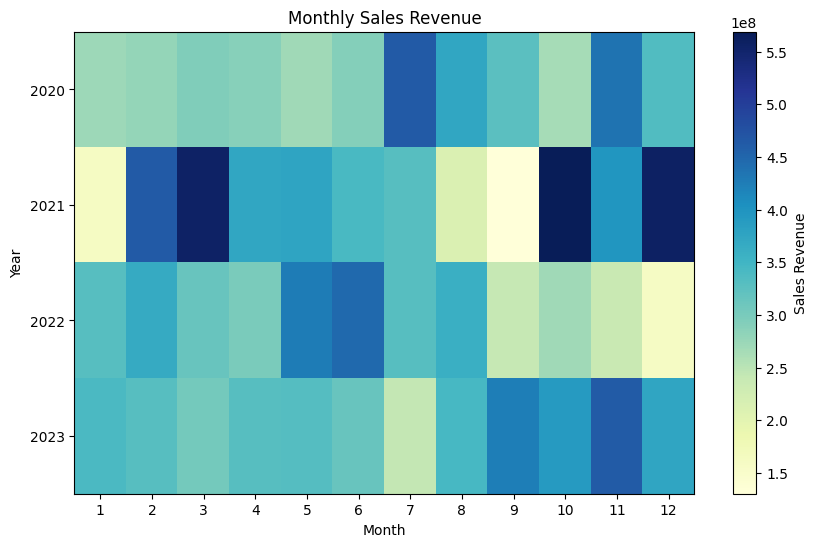

In [152]:
#group by month and get the total sales revenue
monthly_sale = df.groupby(['Year', 'Month'])['Sales Revenue'].sum()

# for heatmap
monthly_sale_heat = monthly_sale.unstack()

plt.figure(figsize=(10,6))
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Year')
plt.imshow(monthly_sale_heat, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Sales Revenue')
plt.xticks(range(12), [str(i) for i in range(1,13)])
plt.yticks(range(len(monthly_sale_heat.index)), monthly_sale_heat.index)
plt.show()


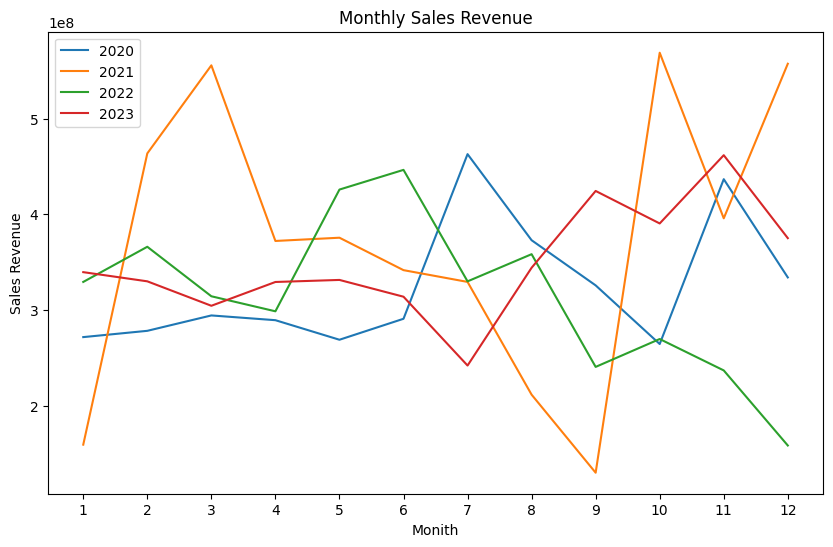

In [153]:

yearly_sales = df.groupby(['Year', 'Month'])['Sales Revenue'].sum().unstack()

# Plot sales data for each year
plt.figure(figsize=(10, 6))
for year in yearly_sales.index:
    plt.plot(yearly_sales.columns, yearly_sales.loc[year], label=year)

plt.title('Monthly Sales Revenue')
plt.xlabel('Monith')
plt.ylabel('Sales Revenue')
plt.xticks(range(1, 13))
plt.legend()
plt.show()

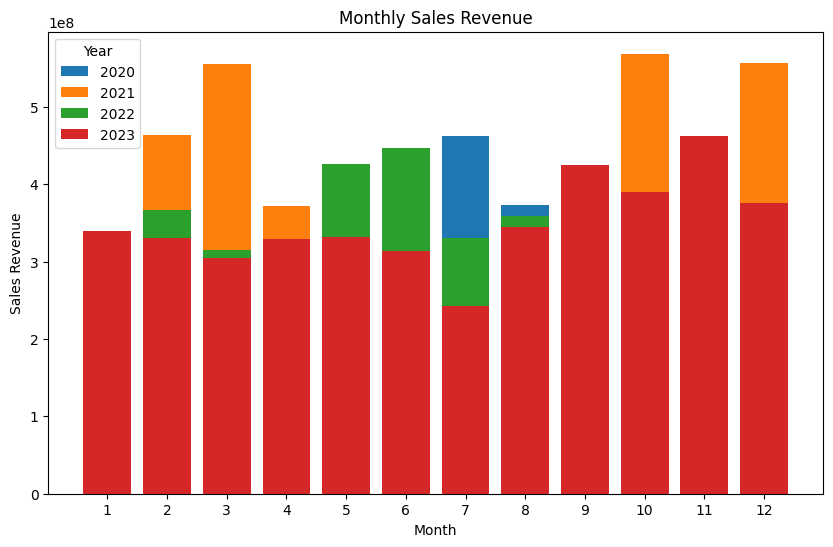

In [154]:
# Convert the line plot to a stacked bar chart
plt.figure(figsize=(10, 6))
for year in yearly_sales.index:
    plt.bar(yearly_sales.columns, yearly_sales.loc[year], label=str(year))

plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()


**Is there a relationship between the date of purchase and the profit margin?**


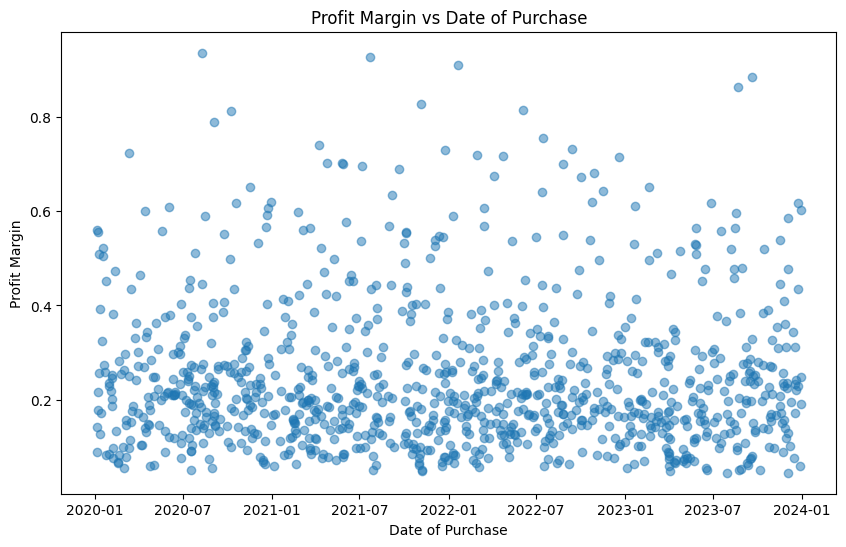

In [155]:
df['Profit Margin'] = df['Profit per unit'] / df['unit_price']

plt.figure(figsize=(10,6))
plt.scatter(df.index, df['Profit Margin'], alpha=0.5)
plt.title('Profit Margin vs Date of Purchase')
plt.xlabel('Date of Purchase')
plt.ylabel('Profit Margin')
plt.show()

# Cost Analysis

**What is the total cost of goods sold as a percentage of revenue**

In [156]:
df['COGS'] = df['Units Sold'] * df['Profit per unit']

df['COGS_Percentage'] = (df['COGS'] / df['Sales Revenue']) * 100

avg_cogs = df['COGS_Percentage'].mean()

In [157]:
#the result
print("The Average COGS Percentage:", avg_cogs)

The Average COGS Percentage: 24.562741434806348


**How does the COGS vary across different produtcts?**

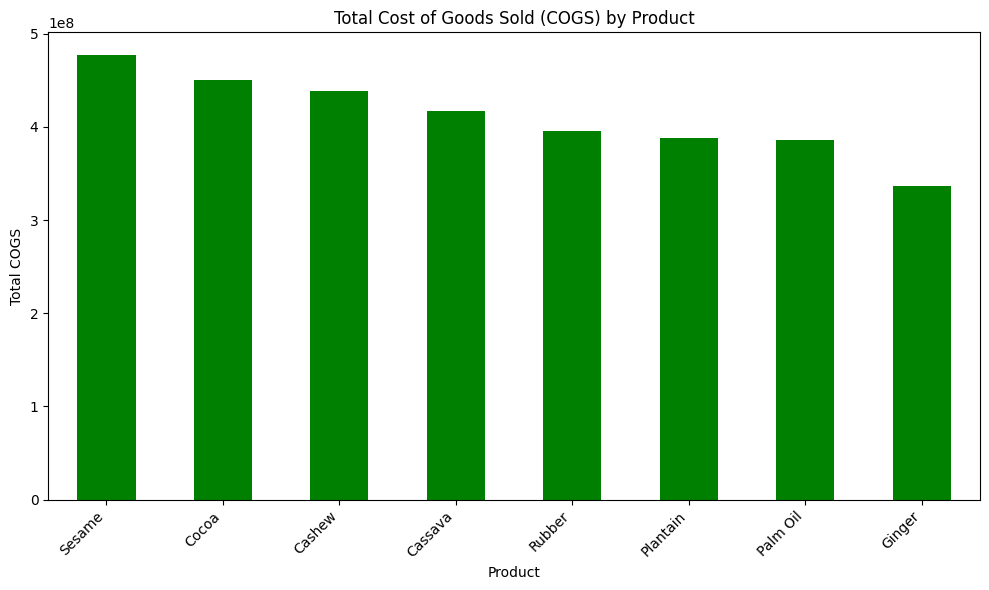

In [158]:
product_cogs = df.groupby('Product Name')['COGS'].sum()

product_cogs = product_cogs.sort_values(ascending=False)

plt.figure(figsize=(10,6))
product_cogs.plot(kind='bar', color='green')
plt.title('Total Cost of Goods Sold (COGS) by Product')
plt.xlabel('Product')
plt.ylabel('Total COGS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Geographic Data

**Which destination ports receive the highest volume of exports**

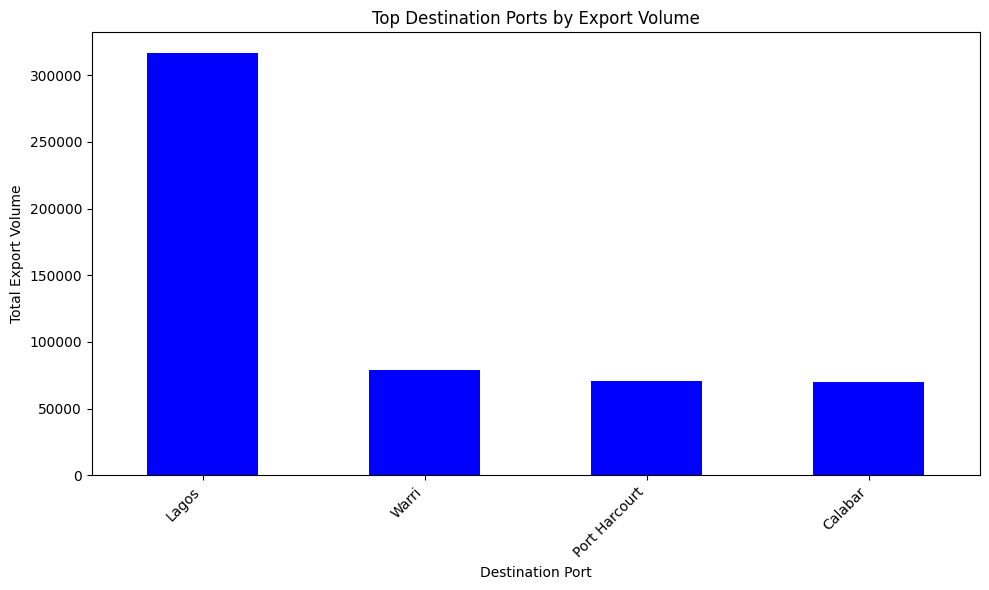

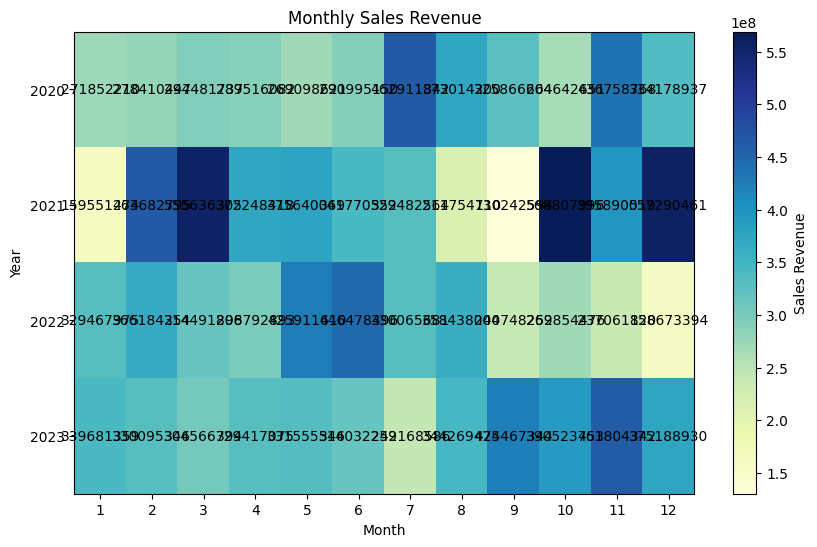

In [159]:
port_volumes = df.groupby('Destination Port')['Units Sold'].sum()

port_volumes = port_volumes.sort_values(ascending=False)

plt.figure(figsize=(10,6))
port_volumes.plot(kind='bar', color='blue')
plt.title('Top Destination Ports by Export Volume')
plt.xlabel('Destination Port')
plt.ylabel('Total Export Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()# Group by month and calculate total sales revenue
monthly_sales = df.groupby(['Year', 'Month'])['Sales Revenue'].sum()

# Reshape the data for heatmap visualization
monthly_sales_heatmap = monthly_sales.unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Year')
plt.imshow(monthly_sales_heatmap, cmap='YlGnBu', aspect='auto')

# Add values to the heatmap
for i in range(len(monthly_sales_heatmap.index)):
    for j in range(12):
        plt.text(j, i, f'{monthly_sales_heatmap.iloc[i, j]:.0f}', ha='center', va='center', color='black')

plt.colorbar(label='Sales Revenue')
plt.xticks(range(12), [str(i) for i in range(1, 13)])
plt.yticks(range(len(monthly_sales_heatmap.index)), monthly_sales_heatmap.index)
plt.show()


**What are the transportation modes commonly used for exports**


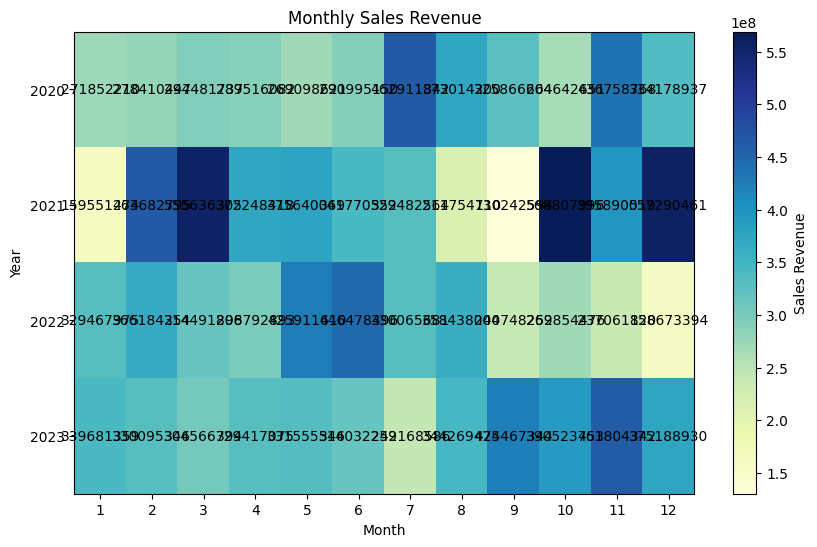

Transportation Mode
Sea    1000
Name: count, dtype: int64


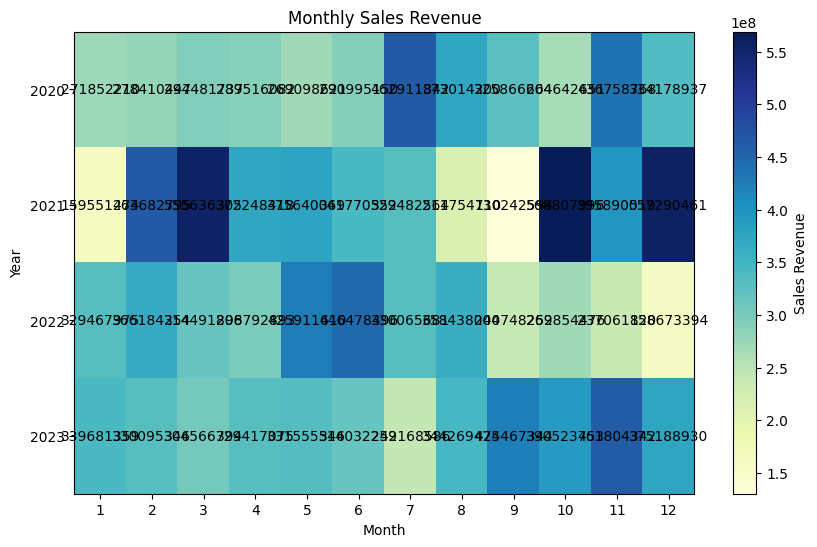

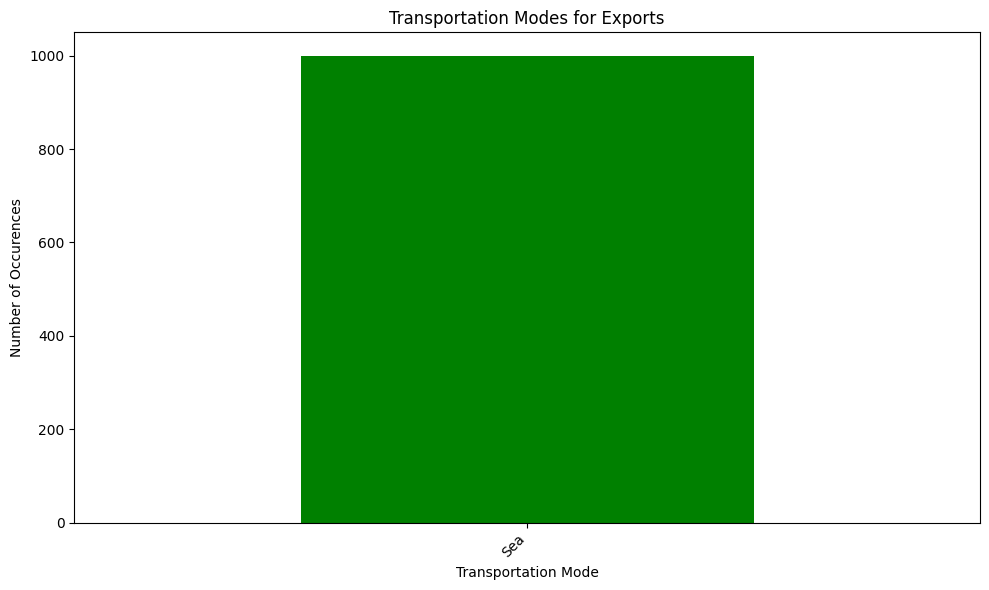

In [160]:
trans = df['Transportation Mode'].value_counts()
# Group by month and calculate total sales revenue
monthly_sales = df.groupby(['Year', 'Month'])['Sales Revenue'].sum()

# Reshape the data for heatmap visualization
monthly_sales_heatmap = monthly_sales.unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Year')
plt.imshow(monthly_sales_heatmap, cmap='YlGnBu', aspect='auto')

# Add values to the heatmap
for i in range(len(monthly_sales_heatmap.index)):
    for j in range(12):
        plt.text(j, i, f'{monthly_sales_heatmap.iloc[i, j]:.0f}', ha='center', va='center', color='black')

plt.colorbar(label='Sales Revenue')
plt.xticks(range(12), [str(i) for i in range(1, 13)])
plt.yticks(range(len(monthly_sales_heatmap.index)), monthly_sales_heatmap.index)
plt.show()

print(trans)# Group by month and calculate total sales revenue
monthly_sales = df.groupby(['Year', 'Month'])['Sales Revenue'].sum()

# Reshape the data for heatmap visualization
monthly_sales_heatmap = monthly_sales.unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Year')
plt.imshow(monthly_sales_heatmap, cmap='YlGnBu', aspect='auto')

# Add values to the heatmap
for i in range(len(monthly_sales_heatmap.index)):
    for j in range(12):
        plt.text(j, i, f'{monthly_sales_heatmap.iloc[i, j]:.0f}', ha='center', va='center', color='black')

plt.colorbar(label='Sales Revenue')
plt.xticks(range(12), [str(i) for i in range(1, 13)])
plt.yticks(range(len(monthly_sales_heatmap.index)), monthly_sales_heatmap.index)
plt.show()


plt.figure(figsize=(10,6))
trans.plot(kind='bar', color='green')
plt.title('Transportation Modes for Exports')
plt.xlabel('Transportation Mode')
plt.ylabel('Number of Occurences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Rank the destination port by the export value**

In [161]:
port_value = df.groupby('Destination Port')['Export Value'].sum()

port_value = port_value.sort_values(ascending=False)

print("The Ranked Destination Ports by Export Value:")
for port, value in port_value.items():
    print(f"{port}: {'{:,.0f}'.format(value)}")

The Ranked Destination Ports by Export Value:
Lagos: 9,738,667,213
Warri: 2,347,899,568
Port Harcourt: 2,152,910,058
Calabar: 2,078,187,640


**Show the top export product for each port**

In [162]:
port_product = df.groupby(['Destination Port', 'Product Name'])['Export Value'].sum()

top_prod = port_product.groupby('Destination Port').idxmax()

print("The Top Export Product for Each Port:")
for port, product in top_prod.items():
    print(f"Port: {port}, Top Export Product: {product[1]}")

The Top Export Product for Each Port:
Port: Calabar, Top Export Product: Sesame
Port: Lagos, Top Export Product: Cashew
Port: Port Harcourt, Top Export Product: Cocoa
Port: Warri, Top Export Product: Cocoa


# Performance Comparison

**How does each product perform in terms of profit margin?**

In [163]:
prod_profit_margin = df.groupby('Product Name')['Profit Margin'].mean()

print("The Average Profit Margin for Each Product:")
print(prod_profit_margin)

The Average Profit Margin for Each Product:
Product Name
Cashew      0.250251
Cassava     0.278207
Cocoa       0.218691
Ginger      0.254825
Palm Oil    0.249915
Plantain    0.238636
Rubber      0.222805
Sesame      0.255824
Name: Profit Margin, dtype: float64


**Can we compare the performance of different companies based on units sold and profit generated?**

In [164]:
company_performance = df.groupby('Company').agg({
    'Units Sold': 'sum',
    'Profit per unit': 'sum'
})

company_performance.rename(columns={
    'Units Sold': 'Total Units Sold',
    'Profit per unit': 'Total Profit'
}, inplace=True)

company_performance

,Total Units Sold,Total Profit
Company,,
Agriplus Nigeria Limited,52139,584842.54
Agro Allied Exporters Nigeria Limited,47204,534559.33
Agro Export Nigeria Ltd,59944,665069.73
Farmgate Nigeria Limited,52010,623667.87
Golden Farms Nigeria Limited,60724,613402.96
Greenfield Agro Exporters Nigeria Limited,50633,608202.81
Nigeria Agro Export Company,54717,672245.24
Nigerian Export Promotion Council (NEPC),55833,625069.60
Prime Agro Exports Nigeria Limited,52035,605966.98


<Figure size 1000x600 with 0 Axes>

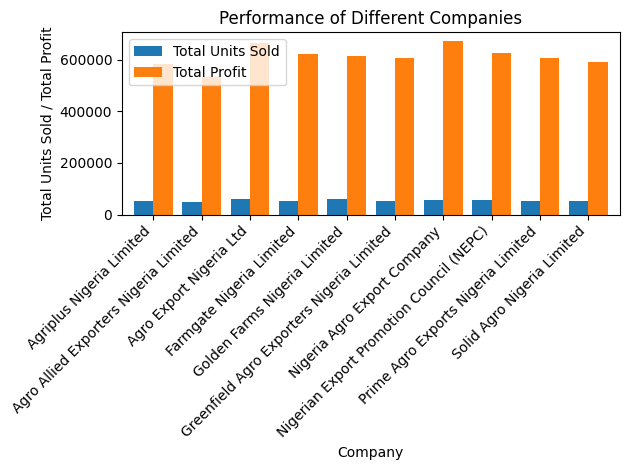

In [165]:
# visualize it
plt.figure(figsize=(10,6))
company_performance.plot(kind='bar', width=0.8)
plt.title('Performance of Different Companies')
plt.xlabel('Company')
plt.ylabel('Total Units Sold / Total Profit')
plt.xticks(rotation=45, ha='right')
plt.legend(["Total Units Sold", "Total Profit"])
plt.tight_layout()
plt.show()

# Performance Comparison

**Identify underperforming products that needs attention?**

In [166]:
product_performance = df.groupby('Product Name').agg({
    'Units Sold': 'sum',
    'Sales Revenue': 'sum',
    'Profit Margin': 'mean'
})


# you can consider products with lower than average values in units sold, sales revenue, and profit margin as underperforming
average_units_sold = product_performance['Units Sold'].mean()
average_sales_revenue = product_performance['Sales Revenue'].mean()
average_profit_margin = product_performance['Profit Margin'].mean()

underperforming_products = product_performance[
    (product_performance['Units Sold'] < average_units_sold) &
    (product_performance['Sales Revenue'] < average_sales_revenue) &
    (product_performance['Profit Margin'] < average_profit_margin)
]

print("Underperforming Products that Need Attention:")
print(underperforming_products)


Underperforming Products that Need Attention:
              Units Sold  Sales Revenue  Profit Margin
Product Name                                          
Plantain           64863   1.947170e+09       0.238636


# Conclusion:

Thanks for going through this notebook and its analysis. 
I'm open for criticism

# 1.# Highest Percentage Increase in Agricultural Export Value

In [167]:
#--- step 1: Import libraries ---

In [168]:
# --- Step 2: Load the dataset ---
df = pd.read_csv("nigeria_agricultural_exports.csv")

In [169]:
# --- Step 3: Prepare the data ---
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [170]:
# Extract Year
df["Year"] = df["Date"].dt.year

In [171]:
# Group by Product and Year to get total export value
yearly_exports = df.groupby(["Product Name", "Year"])["Export Value"].sum().reset_index()


In [172]:
# --- Step 4: Calculate percentage change per product ---
percentage_changes = []
for product, group in yearly_exports.groupby("Product Name"):
    group = group.sort_values("Year")
    first_value = group["Export Value"].iloc[0]
    last_value = group["Export Value"].iloc[-1]
    if first_value > 0:  # Avoid division by zero
        pct_change = ((last_value - first_value) / first_value) * 100
        percentage_changes.append((product, pct_change))

In [173]:
# --- Step 5: Find product with maximum increase ---
max_increase_product = max(percentage_changes, key=lambda x: x[1])
print(f"Highest Percentage Increase: {max_increase_product[0]} ({max_increase_product[1]:.2f}%)")


Highest Percentage Increase: Cocoa (54.14%)


In [174]:
# --- Step 6: Create DataFrame for plotting ---
product_changes_df = pd.DataFrame(percentage_changes, columns=["Product Name", "Percentage Increase"])
product_changes_df = product_changes_df.sort_values("Percentage Increase", ascending=False)

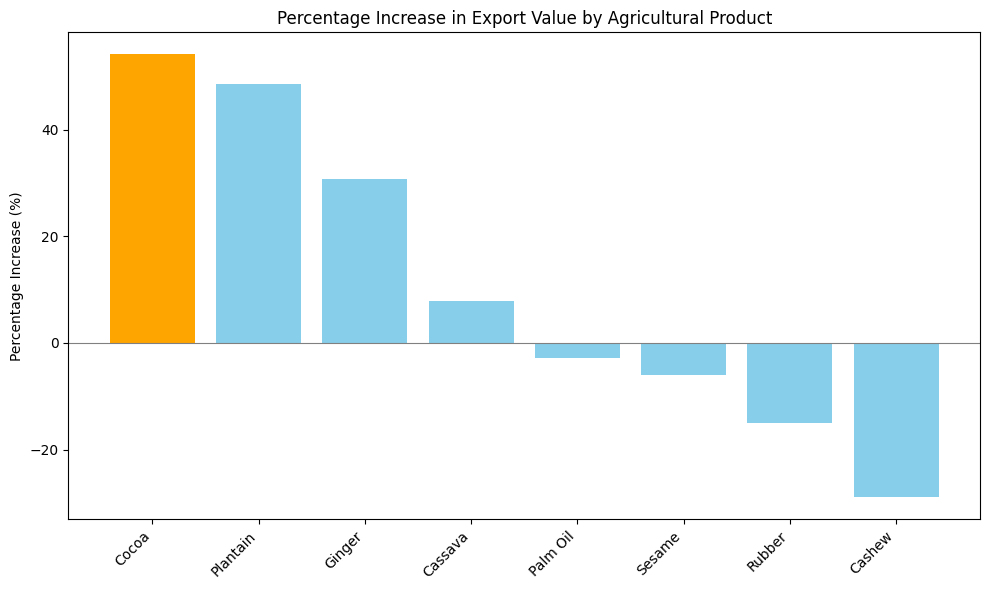

In [175]:
# --- Step 7: Plot the graph ---
plt.figure(figsize=(10, 6))
plt.bar(product_changes_df["Product Name"], product_changes_df["Percentage Increase"], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Percentage Increase (%)")
plt.title("Percentage Increase in Export Value by Agricultural Product")
plt.axhline(0, color='gray', linewidth=0.8)
# Highlight max increase in orange
max_product, max_value = max_increase_product
plt.bar(max_product, max_value, color='orange')

plt.tight_layout()
plt.show()

# 2.Seasonal Pattern of Perishable Agricultural Exports

In [176]:
# --- Step 1: Load dataset ---
df = pd.read_csv("nigeria_agricultural_exports.csv")

In [177]:
# --- Step 2: Convert Date to datetime ---
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [178]:
# --- Step 3: Define list of perishable products ---
# You can adjust this list based on your dataset
perishable_products = ["Plantain", "Ginger", "Cocoa", "Cassava", "Palm Oil", "Sesame"]

In [179]:
# Filter for perishable products only
perishable_df = df[df["Product Name"].isin(perishable_products)].copy()

In [180]:
# --- Step 4: Monthly Pattern ---
perishable_df["Month"] = perishable_df["Date"].dt.month
monthly_pattern = perishable_df.groupby("Month")["Export Value"].sum().reset_index()

In [181]:
# --- Step 5: Quarterly Pattern ---
perishable_df["Quarter"] = perishable_df["Date"].dt.quarter
quarterly_pattern = perishable_df.groupby("Quarter")["Export Value"].sum().reset_index()

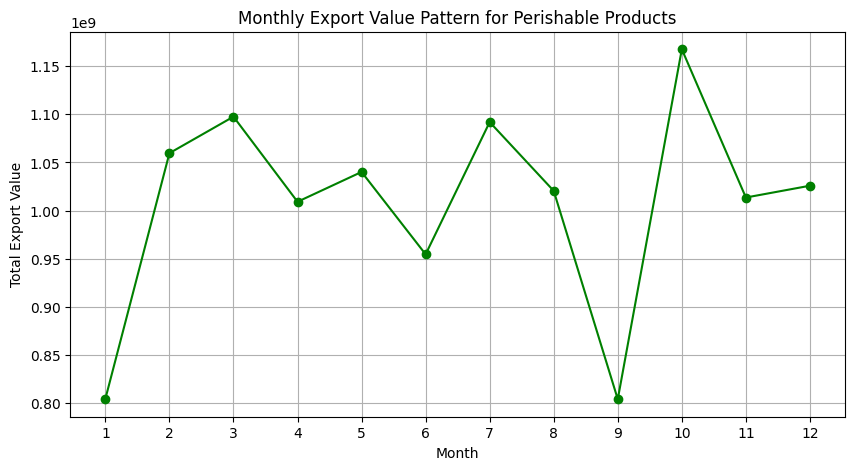

In [182]:
# --- Step 6: Plot Monthly Pattern ---
plt.figure(figsize=(10,5))
plt.plot(monthly_pattern["Month"], monthly_pattern["Export Value"], marker='o', color='green')
plt.xticks(range(1, 13))
plt.title("Monthly Export Value Pattern for Perishable Products")
plt.xlabel("Month")
plt.ylabel("Total Export Value")
plt.grid(True)
plt.show()


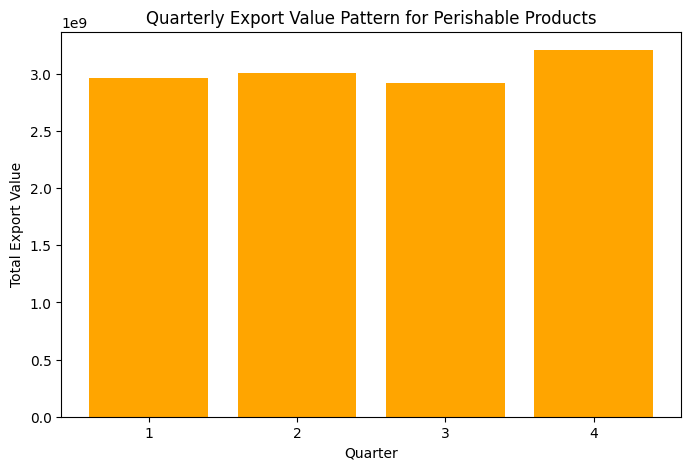

In [183]:
# --- Step 7: Plot Quarterly Pattern ---
plt.figure(figsize=(8,5))
plt.bar(quarterly_pattern["Quarter"], quarterly_pattern["Export Value"], color='orange')
plt.xticks([1, 2, 3, 4])
plt.title("Quarterly Export Value Pattern for Perishable Products")
plt.xlabel("Quarter")
plt.ylabel("Total Export Value")
plt.show()

# 3."Top 3 Agricultural Export Share Analysis (Yearly Trends)"

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
# --- Step 1: Load dataset ---
df = pd.read_csv("nigeria_agricultural_exports.csv")

In [186]:
# --- Step 2: Prepare date column ---
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

In [187]:
# --- Step 3: Calculate total export value by year & product ---
year_product_revenue = df.groupby(["Year", "Product Name"])["Export Value"].sum().reset_index()

In [188]:
# --- Step 4: Get total export value & top 4 products each year ---
yearly_summary = []
for year, group in year_product_revenue.groupby("Year"):
    group_sorted = group.sort_values("Export Value", ascending=False)
    total_sum = group_sorted["Export Value"].sum()
    top4_products = group_sorted.head(4)["Product Name"].tolist()
    
    yearly_summary.append({
        "Year": year,
        "Total Export Value": total_sum,
        "Top 4 Products": ", ".join(top4_products)
    })

In [189]:
# Convert to DataFrame
summary_df = pd.DataFrame(yearly_summary)

In [190]:
# --- Step 5: Display the table ---
print(summary_df)

   Year  Total Export Value                    Top 4 Products
0  2020        3.891727e+09  Sesame, Cashew, Palm Oil, Rubber
1  2021        4.461998e+09  Rubber, Cashew, Sesame, Plantain
2  2022        3.776169e+09     Cocoa, Rubber, Sesame, Cashew
3  2023        4.187771e+09  Cocoa, Plantain, Sesame, Cassava


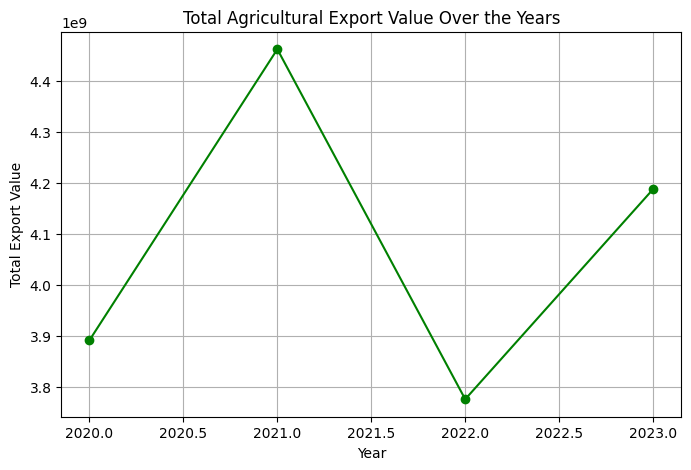

In [191]:
# --- Step 6: Plot total export trend ---
plt.figure(figsize=(8,5))
plt.plot(summary_df["Year"], summary_df["Total Export Value"], marker='o', color='green')
plt.title("Total Agricultural Export Value Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Export Value")
plt.grid(True)
plt.show()

# 4.Most Consistent Export Destination Analysis:(low Year-to-Year Variance Across Products)

In [201]:
# Load the data
df = pd.read_csv('nigeria_agricultural_exports.csv')

In [202]:
# Convert date to datetime and extract year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [203]:
# Calculate total export value by country and year
country_year_totals = df.groupby(['Export Country', 'Year'])['Export Value'].sum().reset_index()

In [204]:
# Calculate variance for each country
country_variance = country_year_totals.groupby('Export Country')['Export Value'].var().reset_index()
country_variance.columns = ['Export Country', 'Variance']

In [205]:
# Sort by variance (ascending for most consistent)
country_variance_sorted = country_variance.sort_values('Variance')

In [206]:
# Get the most consistent country
most_consistent = country_variance_sorted.iloc[0]
print(f"The most consistent export country is {most_consistent['Export Country']} with a variance of {most_consistent['Variance']:.2f}")

The most consistent export country is Sweden with a variance of 1259633376306093.75


In [207]:
# Prepare data for visualization
pivot_data = country_year_totals.pivot(index='Year', columns='Export Country', values='Export Value')


In [208]:
# Show the variance table
print("\nVariance by Export Country:")
print(country_variance_sorted.to_string(index=False))


Variance by Export Country:
Export Country     Variance
        Sweden 1.259633e+15
       Austria 2.027951e+15
   Netherlands 3.192744e+15
         Italy 3.568288e+15
   Switzerland 7.049978e+15
        France 8.531909e+15
       Denmark 9.563737e+15
         Spain 1.020749e+16
       Germany 1.238591e+16
       Belgium 1.387857e+16


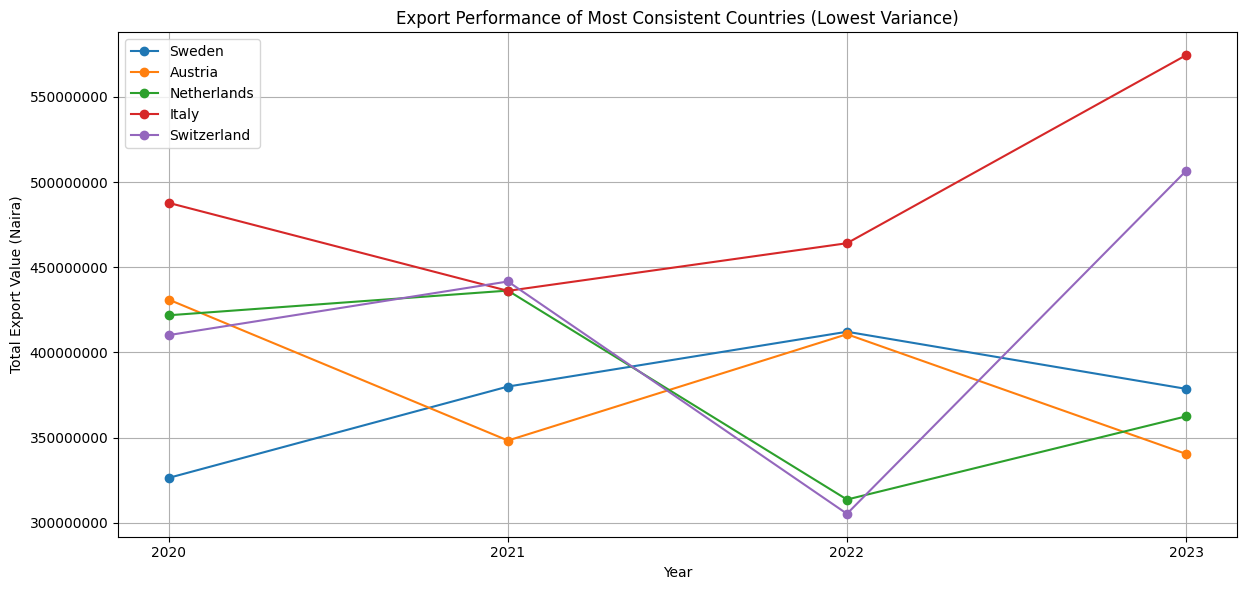

In [209]:
# Plot the export trends for top 5 most consistent countries
plt.figure(figsize=(12, 6))
top_5_consistent = country_variance_sorted.head(5)['Export Country']
for country in top_5_consistent:
    plt.plot(pivot_data.index, pivot_data[country], label=country, marker='o')

plt.title('Export Performance of Most Consistent Countries (Lowest Variance)')
plt.xlabel('Year')
plt.ylabel('Total Export Value (Naira)')
plt.legend()
plt.grid(True)
plt.xticks(pivot_data.index)
plt.tight_layout()

# Format y-axis to show full numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()